In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


# Task 2. Model fit and evaluation

In [5]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


In [6]:
df = fit.draws_pd()
df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height
0,-896.475,0.989141,0.879734,3.0,7.0,0.0,898.035,155.103,8.10072,151.389
1,-895.714,0.996108,0.879734,2.0,3.0,0.0,896.915,154.992,7.57395,153.867
2,-896.343,0.895673,0.879734,2.0,3.0,0.0,897.119,155.228,7.90630,146.875
3,-895.404,0.991829,0.879734,2.0,3.0,0.0,896.577,154.815,7.56726,154.424
4,-895.849,0.841095,0.879734,2.0,3.0,0.0,896.865,154.890,8.04910,147.182


### Plot a joint distribution of fitted mu.

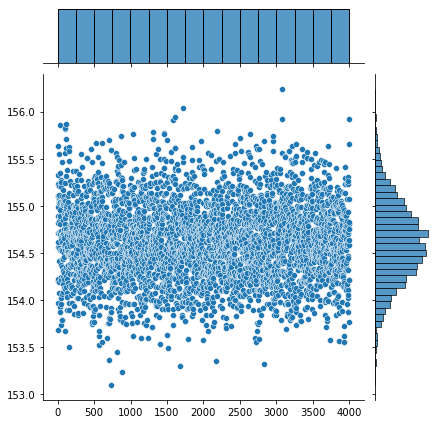

In [9]:
mu = fit.stan_variable('mu')
sns.jointplot(data = mu)

### Plot a joint distribution of fitted sigma.

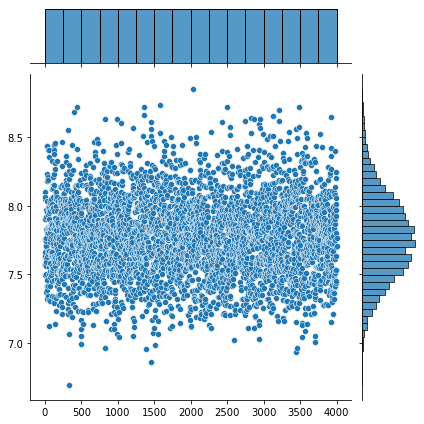

In [10]:
sigma = fit.stan_variable('sigma')
sns.jointplot(data = sigma)

### Plot histograms of data and simulated heights and evaluate the quality of model.

(array([  1.,   0.,   1.,   1.,   8.,   5.,  14.,  31.,  54.,  68., 144.,
        193., 239., 305., 386., 401., 401., 363., 352., 298., 223., 196.,
        123.,  93.,  60.,  20.,   9.,   5.,   4.,   2.]),
 array([122.657     , 124.60306667, 126.54913333, 128.4952    ,
        130.44126667, 132.38733333, 134.3334    , 136.27946667,
        138.22553333, 140.1716    , 142.11766667, 144.06373333,
        146.0098    , 147.95586667, 149.90193333, 151.848     ,
        153.79406667, 155.74013333, 157.6862    , 159.63226667,
        161.57833333, 163.5244    , 165.47046667, 167.41653333,
        169.3626    , 171.30866667, 173.25473333, 175.2008    ,
        177.14686667, 179.09293333, 181.039     ]),
 <BarContainer object of 30 artists>)

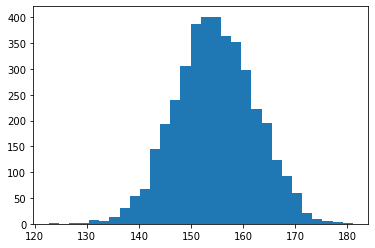

In [14]:
height = fit.stan_variable('height')

plt.hist(height, bins = 30)